In [1]:
from src.PCA import run_PCA, loss, FairPCA, frank_wolfe_NSW, factors
from src.data_utils import parse_VCF, load_1KG_genotype, load_1KG_annotations

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns

In [25]:
def keep_top_variance(train_data,top_snps):

    variance = train_data.var(axis=0)
    idx = np.argsort(-variance)
    train_data = train_data[:,idx]
    train_data = train_data[:,:top_snps]
    
    return train_data

def keep_random(train_data,top_snps):

    n,m = train_data.shape
    idx = np.random.choice(np.arange(m),size=top_snps)
    train_data = train_data[:,idx]
    return train_data


In [7]:
train_data = load_1KG_genotype("data/1000Genomes/recoded_1000G.noadmixed.mat")

In [32]:
reduced_data = keep_top_variance(train_data,5000)
scaled_data = scale(reduced_data)

In [15]:
train_labels = load_1KG_annotations("data/1000Genomes/recoded_1000G.raw.noadmixed.lbls_super")

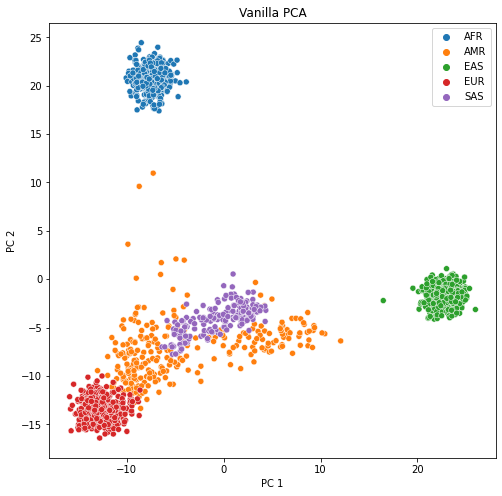

CPU times: user 1.79 s, sys: 175 ms, total: 1.97 s
Wall time: 1.59 s


In [33]:
%%time

fig = plt.figure(figsize=(8,8))
ax = plt.axes()
pca = PCA(n_components=2)
pca.fit(scaled_data)
p_components = pca.components_.T

projected = scaled_data @ p_components
reconstruction_loss = loss(scaled_data,p_components)

a,b = np.split(projected,2,1)
a = a.ravel()
b = b.ravel()

sns.scatterplot(x=a,y=b,hue=train_labels,ax=ax)
plt.ylabel('PC 2')
plt.xlabel('PC 1')
plt.title('Vanilla PCA')
plt.show()